In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)


# Ejercicio 3

In [126]:
def sigmoidea(x):
    return np.divide(2, (1 + np.exp(-x))) - 1

In [127]:
class layer:
    def __init__(self, n_neuron, n_x):
        self.n_neuron = n_neuron
        self.n_entradas = n_x
        self.w = np.random.normal(loc = 0, scale = 0.15, size =(n_neuron,n_x))
        
    def calculate_y(self,x):
        y = np.dot(self.w,x)
        #print(y)
        y = sigmoidea(y)
        return y   


In [128]:
def perceptron_multilayer_init(neurons_perLayer, n_x):
    network=[]
    aux_n_x = n_x
    for i in range(neurons_perLayer.shape[0]):
        network.append(layer(neurons_perLayer[i], aux_n_x + 1))
        aux_n_x = neurons_perLayer[i]
    return(network)

In [129]:
def perceptron_multilayer_forward(network,x):
    # completa la primera capa
    y=[x]
    for i in range(len(network)):
        # print(np.hstack((-1, y[i])))
        y.append( \
                network[i].calculate_y( \
                    np.hstack((-1, y[i]))\
                        )\
        )
        # print(y)
    return y

In [142]:
def perceptron_multilayer_backward(network,y,yd):
    # e=np.sum(((yd-y[-1])**2))
    e=yd-y[-1]
    grad=[]
    grad.append(np.multiply(np.multiply(e,np.multiply(np.add(1, y[-1]),np.subtract(1, y[-1]))), 0.5))
    for i in range(len(network)-1,0,-1):
        w_t=network[i].w[:,1:].T
        #print(f'pesos sin la fila de w0 y transpuesto = {w_t}')
        g = np.multiply(np.multiply(np.dot(w_t,grad[len(network)-1-i]),np.multiply(np.add(1, y[i]),np.subtract(1, y[i]))), 0.5)
        grad.append(g)
    return grad


# def perceptron_multilayer_backward(network,y,yd):
#     # e=np.sum(((yd-y[-1])**2))
#     e=yd-y[-1]
#     grad=[]
#     grad.append(np.multiply(e,np.multiply((1+y[-1]),(1-y[-1])))*0.5)
#     for i in range(len(network)-1,0,-1):
#         w_t=network[i].w[:,1:].T
#         #print(f'pesos sin la fila de w0 y transpuesto = {w_t}')
#         grad.append(np.multiply(np.dot(w_t,grad[len(network)-1-i]),np.multiply((1+y[i]),(1-y[i])))*0.5)
#     return grad


In [131]:
def perceptron_multilayer_update(network,y,grad,gamma):
    for i in range(len(network)):
        w_new = gamma * np.outer(grad[-(i+1)],np.hstack((-1, y[i])))
        network[i].w += w_new
        # print(i,network[i].w)
    return network 

# Problema XOR
## Train

In [171]:
ds, M_tst, M_trn  =  generar_particiones('icgtp1datos\XOR_trn.csv', 1, 0.2)
X = ds[M_trn[0,:], :-1]
#X_a = np.array([[-1.0291,0.97256],[1.0325,-1.0188]])

# print(X)
Y_d = ds[M_trn[0,:], -1]
#Y_d = [1, 1]
# print(Y_d)
network = []
# X = np.hstack((-1, np.ones((X.shape[0],1)), X))
n_per_layer = np.array([2, 1])
network = perceptron_multilayer_init(n_per_layer, X.shape[1])
#print(f'pesos capa 1{network[0].w}')
#print(f'pesos capa 2{network[1].w}')

cant_epocas = 40
nu_error = 0.01
error_epocas = []
gamma_aprend = 0.01
mse_epocas = []

for n_epoch in range(cant_epocas):
    for i, pattern in enumerate(X):
        #print('patron:', pattern)
        y = perceptron_multilayer_forward(network, pattern)
        #print(f'salida{i}={y}')
        grad = perceptron_multilayer_backward(network, y, Y_d[i])
        #print(f'gradiente = {grad}')
        network = perceptron_multilayer_update(network, y, grad, gamma_aprend)
    
    # Validación [con todos los patrones]
    errores = 0
    for n, patron in enumerate(X):
        # producto punto
        y_test = perceptron_multilayer_forward(network, patron)
        # estamos suponiendo una sola salida
        #y = -1 if (y_test[-1] < 0) else 1
        y_aux=0
        if (y_test[-1] < 0):
            y_aux=-1
        else:
            y_aux=1
        # print('y',y,'yDeseada',Y_d[n])
        errores += int(y_aux != Y_d[n])
        # print('errores', errores)}

        #cálculo del error cuadrático medio
        mse = np.sum(pow(np.subtract(y_test[-1], Y_d[n]), 2))
        
        # print(mse)
        mse_epoca = np.append(mse_epoca, mse)

    error = (errores/X.shape[0])
        # error = np.sum(((y[-1]-Y_d[i])**2))        
    error_epocas= np.append(error_epocas, [error])
    
    e_prom = np.mean(mse_epoca)
    mse_epocas = np.append(mse_epocas, e_prom)

    # print(f'Epoca {n_epoch}: error = {error}')
    if (error < nu_error):
        # print(f'Época {n_epoch}')
        break
   
print(f'Epoca {n_epoch}: error = {error_epocas[-1]}')

Epoca 15: error = 0.0


### Test

In [172]:
X_test = ds[M_tst[0,:], :-1]
Y_d_test = ds[M_tst[0,:], -1]
errores = 0

for i, pattern in enumerate(X_test):
    y_test = perceptron_multilayer_forward(network, pattern)
    # estamos suponiendo una sola salida
    y = -1 if (y_test[-1] < 0) else 1
    errores += int(y != Y_d_test[i])

print(f'accuracy de prueba {errores / X_test.shape[0]}')



accuracy de prueba 0.0


### Plot

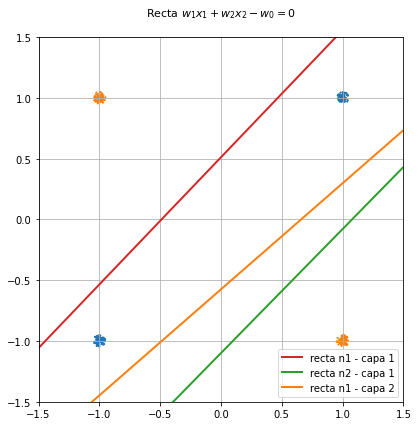

In [173]:
# pesos primer neurona
w1 = network[0].w[0]

# pesos segunda neurona
w2 = network[0].w[1]

# pesos neurona capa 2
w21 = network[1].w[0]

fig1 = plt.figure(figsize=(7, 6), tight_layout=True)
fig1.suptitle('Recta $w_1 x_1 + w_2 x_2 - w_0 = 0$',  fontsize=11)
fig1_ax = fig1.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
fig1_ax.set_aspect('equal')
fig1_ax.grid()

# Patrones
x_x = X_test[:,0]
x_y = X_test[:,1]
x_color = np.where(x_x > 0, np.where(x_y > 0, 'C0', 'C1'), np.where(x_y < 0, 'C0', 'C1'))
fig1_ax.scatter(x_x, x_y, c=x_color, s=5, marker='.')

# Recta
xx = np.arange(-3, 3, 0.01)
a1 = w1[0] / w1[2]
b1 = w1[1] / w1[2]
fig1_ax.plot(xx, a1 - b1 * xx, c='C3', linewidth=2, label = 'recta n1 - capa 1')

a2 = w2[0] / w2[2]
b2 = w2[1] / w2[2]
fig1_ax.plot(xx, a2 - b2 * xx, c='C2', linewidth=2, label = 'recta n2 - capa 1')

a3 = w21[0] / w21[2]
b3 = w21[1] / w21[2]
fig1_ax.plot(xx, a3 - b3 * xx, c='C1', linewidth=2,label = 'recta n1 - capa 2')

fig1_ax.legend(loc = 4)
plt.show()


# Problema Concentlite
## Train

In [169]:
ds, M_tst, M_trn  =  generar_particiones('icgtp1datos\concentlite.csv', 1, 0.2)
X = ds[M_trn[0,:], :-1]
#X_a = np.array([[-1.0291,0.97256],[1.0325,-1.0188]])

# print(X)
Y_d = ds[M_trn[0,:], -1]
#Y_d = [1, 1]
# print(Y_d)
network = []
# X = np.hstack((-1, np.ones((X.shape[0],1)), X))
n_per_layer = np.array([2, 1])
network = perceptron_multilayer_init(n_per_layer, X.shape[1])
#print(f'pesos capa 1{network[0].w}')
#print(f'pesos capa 2{network[1].w}')

cant_epocas = 400
nu_error = 0.01
error_epocas = []
gamma_aprend = 0.01
mse_epocas = []

for n_epoch in range(cant_epocas):
    for i, pattern in enumerate(X):
        #print('patron:', pattern)
        y = perceptron_multilayer_forward(network, pattern)
        #print(f'salida{i}={y}')
        grad = perceptron_multilayer_backward(network, y, Y_d[i])
        #print(f'gradiente = {grad}')
        network = perceptron_multilayer_update(network, y, grad, gamma_aprend)
    
    # Validación [con todos los patrones]
    errores = 0
    for n, patron in enumerate(X):
        # producto punto
        y_test = perceptron_multilayer_forward(network, patron)
        # estamos suponiendo una sola salida
        #y = -1 if (y_test[-1] < 0) else 1
        y_aux=0
        if (y_test[-1] < 0):
            y_aux=-1
        else:
            y_aux=1
        # print('y',y,'yDeseada',Y_d[n])
        errores += int(y_aux != Y_d[n])
        # print('errores', errores)}

        #cálculo del error cuadrático medio
        mse = np.sum(pow(np.subtract(y_test[-1], Y_d[n]), 2))
        
        # print(mse)
        mse_epoca = np.append(mse_epoca, mse)

    error = (errores/X.shape[0])
        # error = np.sum(((y[-1]-Y_d[i])**2))        
    error_epocas= np.append(error_epocas, [error])
    
    e_prom = np.mean(mse_epoca)
    mse_epocas = np.append(mse_epocas, e_prom)

    print(f'Epoca {n_epoch}: error = {error}')
    if (error < nu_error):
        # print(f'Época {n_epoch}')
        break
   
print(f'Epoca {n_epoch}: error = {error_epocas[-1]}')

Epoca 0: error = 0.3568215892053973
Epoca 1: error = 0.3568215892053973
Epoca 2: error = 0.3568215892053973
Epoca 3: error = 0.3568215892053973
Epoca 4: error = 0.3568215892053973
Epoca 5: error = 0.3568215892053973
Epoca 6: error = 0.3568215892053973
Epoca 7: error = 0.3568215892053973
Epoca 8: error = 0.3568215892053973
Epoca 9: error = 0.3568215892053973
Epoca 10: error = 0.3568215892053973
Epoca 11: error = 0.3568215892053973
Epoca 12: error = 0.3568215892053973
Epoca 13: error = 0.3568215892053973
Epoca 14: error = 0.3568215892053973
Epoca 15: error = 0.3568215892053973
Epoca 16: error = 0.3568215892053973
Epoca 17: error = 0.3568215892053973
Epoca 18: error = 0.3568215892053973
Epoca 19: error = 0.3568215892053973
Epoca 20: error = 0.3568215892053973
Epoca 21: error = 0.3568215892053973
Epoca 22: error = 0.3568215892053973
Epoca 23: error = 0.3568215892053973
Epoca 24: error = 0.3568215892053973
Epoca 25: error = 0.3568215892053973
Epoca 26: error = 0.3568215892053973
Epoca 27: e

## Test

In [99]:
X_test = ds[M_tst[0,:], :-1]
Y_d_test = ds[M_tst[0,:], -1]
errores = 0
historial_y =[]

for i, pattern in enumerate(X_test):
    y_test = perceptron_multilayer_forward(network, pattern)
    historial_y = np.append(historial_y, y_test[-1])
    # estamos suponiendo una sola salida
    y = -1 if (y_test[-1] < 0) else 1
    historial_y = np.append(historial_y, y)
    if y != Y_d_test[i]:
        errores += 1

print(f'tasa de aciertos de test {(errores / X_test.shape[0])}')
print(historial_y)


tasa de aciertos de test 0.29518072289156627
[0.04737056 1.         0.07254672 1.         0.12446763 1.
 0.20026839 1.         0.03466543 1.         0.20823273 1.
 0.07083318 1.         0.02988879 1.         0.04579725 1.
 0.39107427 1.         0.04991791 1.         0.30328357 1.
 0.11766391 1.         0.39477812 1.         0.40824619 1.
 0.04433777 1.         0.1440222  1.         0.41520461 1.
 0.04784945 1.         0.0285409  1.         0.40823673 1.
 0.04780159 1.         0.05933764 1.         0.40823673 1.
 0.05199635 1.         0.41911072 1.         0.43036901 1.
 0.40798518 1.         0.42557235 1.         0.40798518 1.
 0.42557235 1.         0.02988879 1.         0.04745224 1.
 0.40715762 1.         0.39477812 1.         0.05215603 1.
 0.32721146 1.         0.41642584 1.         0.42805458 1.
 0.32784333 1.         0.36433237 1.         0.25840035 1.
 0.03929818 1.         0.12123158 1.         0.05220828 1.
 0.07915917 1.         0.42558471 1.         0.06497929 1.
 0.30278326

## Plot

[]


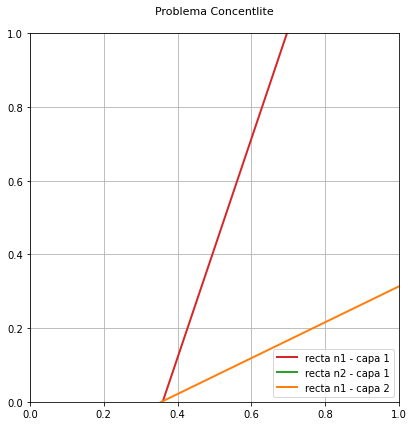

In [97]:
# Código de colores
# [C1] = clase 1 - mal identificados
# [C2] = clase 1 - bien identificados
# [C3] = clase 2 - mal identificados
# [C4] = clase 2 - bien identificados

# Pregunto por el valor de la salida, si es 1 y está dentro del vector de índices erróneos, entra en C1
# Si es 1 y no está dentro, C2
# Si es -1 y está dentro, C3
# Si es 1 y no está dentro, C4

# pesos primer neurona

w1 = network[0].w[0]

# pesos segunda neurona
w2 = network[0].w[1]

# pesos neurona capa 2
w21 = network[1].w[0]

fig1 = plt.figure(figsize=(7, 6), tight_layout=True)
fig1.suptitle('Problema Concentlite',  fontsize=11)
fig1_ax = fig1.add_subplot(autoscale_on=False)
fig1_ax.set_aspect('equal')
fig1_ax.grid()

# Patrones
x_x = X_test[:,0]
x_y = X_test[:,1]


# Código de colores
# [C0] = clase 1 - bien identificados
# [C1] = clase 1 - mal identificados
# [C2] = clase 2 - bien identificados
# [C3] = clase 2 - mal identificados

x_color = []
for i in range(len(historial_y)):
    
    if historial_y[i] == 1 and Y_d_test[i] == 1:
        x_color.append('C0')
    if historial_y[i] == 1 and Y_d_test[i] != 1:
        x_color.append('C1')
    if historial_y[i] == -1 and Y_d_test[i] == 1:
        x_color.append('C2')
    if historial_y[i] == 1 and Y_d_test[i] != 1:
        x_color.append('C3')
print(x_color)

fig1_ax.scatter(x_x, x_y, c=x_color, s=5, marker='.')


# Recta
xx = np.arange(-3, 3, 0.01)
a1 = w1[0] / w1[2]
b1 = w1[1] / w1[2]
fig1_ax.plot(xx, a1 - b1 * xx, c='C3', linewidth=2, label = 'recta n1 - capa 1')

a2 = w2[0] / w2[2]
b2 = w2[1] / w2[2]
fig1_ax.plot(xx, a2 - b2 * xx, c='C2', linewidth=2, label = 'recta n2 - capa 1')

a3 = w21[0] / w21[2]
b3 = w21[1] / w21[2]
fig1_ax.plot(xx, a3 - b3 * xx, c='C1', linewidth=2,label = 'recta n1 - capa 2')

fig1_ax.legend(loc = 4)


ValueError: ['C1', 'C2', 'C3'] is not a valid value for color

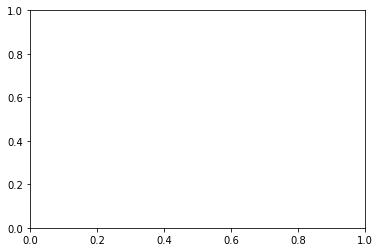

In [82]:
plt.plot([1, 2, 3], [1, 2, 3], color = ['C1', 'C2', 'C3'])

# Ejercicio 4
## Problema irisbin
### Train

In [57]:
ds, M_tst, M_trn  =  generar_particiones('icgtp1datos\irisbin.csv', 1, 0.2)
print(ds)
X = ds[M_trn[0,:], :-3]
#X_a = np.array([[-1.0291,0.97256],[1.0325,-1.0188]])

print(X)
Y_d = ds[M_trn[0,:], -3:]
#Y_d = [1, 1]
print(Y_d)
network = []
# X = np.hstack((-1, np.ones((X.shape[0],1)), X))
n_per_layer = np.array([2, 1])
network = perceptron_multilayer_init(n_per_layer, X.shape[1])
#print(f'pesos capa 1{network[0].w}')
#print(f'pesos capa 2{network[1].w}')

cant_epocas = 300
nu_error = 0.03
error_porc_epocas = []
mse_epocas = []
gamma_aprend = 0.01

for n_epoch in range(cant_epocas):
    for i, pattern in enumerate(X):
        # print('patron:', pattern)
        y = perceptron_multilayer_forward(network, pattern)
        #print(f'salida{i}={y}')
        grad = perceptron_multilayer_backward(network, y, Y_d[i])
        #print(f'gradiente = {grad}')
        network = perceptron_multilayer_update(network, y, grad, gamma_aprend)
    
    # Validación [con todos los patrones]
    errores = 0
    mse_epoca = []
    for n, patron in enumerate(X):
        # producto punto
        y_test = perceptron_multilayer_forward(network, patron)
        # estamos suponiendo una sola salida
        # y = -1 if (y_test[-1] < 0) else 1
        # print(y_test[-1])
        # cálculo del error por tasa de aciertos
        y_aux=0
        if (y_test[-1] < 0):
            y_aux=-1
        else:
            y_aux=1
        # print('y',y,'yDeseada',Y_d[n])
        errores += int(y_aux != Y_d[n])
        # print('errores', errores)

        #cálculo del error cuadrático medio
        mse = np.sum(pow(np.subtract(y_test[-1], Y_d[n]), 2))
        
        # print(mse)
        mse_epoca = np.append(mse_epoca, mse)

    error_porc = (errores/X.shape[0]) 
    error_porc_epocas = np.append(error_porc_epocas, error_porc)

    # error_epocas= np.append(error_epocas, [error])
    # print(np.mean(error_epoca))
    # print('mse_epoca:', mse_epoca)
    e_prom = np.mean(mse_epoca)
    mse_epocas = np.append(mse_epocas, e_prom)
    
    # [Consideramos tasa de aciertos como error para corte de train]
    if (error_porc < nu_error):
        break

print(f'Epoca {n_epoch}: error = {error_porc_epocas[-1]}')


[[ 4.5  2.3  1.3 ... -1.  -1.   1. ]
 [ 5.1  3.3  1.7 ... -1.  -1.   1. ]
 [ 7.2  3.   5.8 ...  1.  -1.  -1. ]
 ...
 [ 5.5  2.3  4.  ... -1.   1.  -1. ]
 [ 5.6  2.8  4.9 ...  1.  -1.  -1. ]
 [ 6.1  2.6  5.6 ...  1.  -1.  -1. ]]
[[6.9 3.1 5.4 2.1]
 [5.6 2.8 4.9 2. ]
 [7.2 3.  5.8 1.6]
 [5.1 3.8 1.9 0.4]
 [5.2 3.4 1.4 0.2]
 [7.2 3.6 6.1 2.5]
 [7.1 3.  5.9 2.1]
 [5.6 2.8 4.9 2. ]
 [6.1 2.6 5.6 1.4]
 [5.  3.5 1.3 0.3]
 [5.2 3.4 1.4 0.2]
 [6.1 3.  4.9 1.8]
 [5.1 3.3 1.7 0.5]
 [6.1 2.6 5.6 1.4]
 [5.1 3.3 1.7 0.5]
 [5.2 3.4 1.4 0.2]
 [5.6 3.  4.5 1.5]
 [5.  3.3 1.4 0.2]
 [6.3 3.4 5.6 2.4]
 [5.4 3.  4.5 1.5]
 [6.7 3.1 4.7 1.5]
 [4.5 2.3 1.3 0.3]
 [4.6 3.4 1.4 0.3]
 [6.4 3.1 5.5 1.8]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.4 3.  4.5 1.5]
 [6.7 3.3 5.7 2.5]
 [7.2 3.  5.8 1.6]
 [4.5 2.3 1.3 0.3]
 [6.3 2.5 5.  1.9]
 [6.7 3.1 4.4 1.4]
 [4.6 3.4 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.4 2.8 5.6 2.2]
 [5.5 2.3 4.  1.3]
 [5.6 3.  4.5 1.5]
 [5.4 3.  4.5 1.5]
 [5.4 3.9 1.7 0.4]
 [5.2 3.4 1.4 0.2]
 [5.5 2.3 4.

ValueError: shapes (2,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

### Test

In [ ]:
X_test = ds[M_tst[0,:], :-1]
Y_d_test = ds[M_tst[0,:], -1]
errores = 0

for i, pattern in enumerate(X_test):
    y_test = perceptron_multilayer_forward(network, pattern)
    # estamos suponiendo una sola salida
    y = -1 if (y_test[-1] < 0) else 1
    errores += int(y != Y_d_test[i])

print(errores / X_test.shape[0])



0.04819277108433735


### Plot

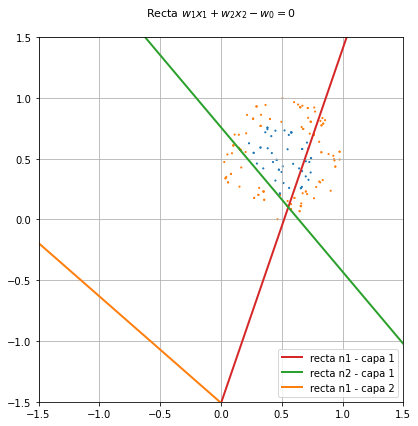

In [ ]:
# pesos primer neurona
w1 = network[0].w[0]

# pesos segunda neurona
w2 = network[0].w[1]

# pesos neurona capa 2
w21 = network[1].w[0]

fig1 = plt.figure(figsize=(7, 6), tight_layout=True)
fig1.suptitle('Recta $w_1 x_1 + w_2 x_2 - w_0 = 0$',  fontsize=11)
fig1_ax = fig1.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
fig1_ax.set_aspect('equal')
fig1_ax.grid()

# Patrones
x_x = X_test[:,0]
x_y = X_test[:,1]

x_color = np.where(Y_d_test>0, 'C1', 'C0')
fig1_ax.scatter(x_x, x_y, c=x_color, s=5, marker='.')

x_color = np.where(Y_d_test>0, 'C1', 'C0')



# Recta
xx = np.arange(-3, 3, 0.01)
a1 = w1[0] / w1[2]
b1 = w1[1] / w1[2]
fig1_ax.plot(xx, a1 - b1 * xx, c='C3', linewidth=2, label = 'recta n1 - capa 1')

a2 = w2[0] / w2[2]
b2 = w2[1] / w2[2]
fig1_ax.plot(xx, a2 - b2 * xx, c='C2', linewidth=2, label = 'recta n2 - capa 1')

a3 = w21[0] / w21[2]
b3 = w21[1] / w21[2]
fig1_ax.plot(xx, a3 - b3 * xx, c='C1', linewidth=2,label = 'recta n1 - capa 2')

fig1_ax.legend(loc = 4)
